# Unsupervised Machine Learning by K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


## Step 1: Data Preparation

In [ ]:
!pwd

In [3]:
# Load input data
# x = pd.read_csv('../data/sales.csv', delimiter=',')
# X = x.values
# X = X[:,1:]

X = np.loadtxt('../data/clustering.txt', delimiter=',')
print(X)

[[ 2.08  1.05]
 [ 2.05  7.7 ]
 [ 4.53  5.49]
 [ 6.23  1.02]
 [ 5.35  7.86]
 [ 2.88  0.79]
 [ 2.32  8.5 ]
 [ 5.06  5.65]
 [ 5.38  3.53]
 [ 6.31  9.73]
 [ 3.41  2.05]
 [ 1.75  7.38]
 [ 3.88  5.73]
 [ 7.22  2.88]
 [ 5.85  9.11]
 [ 3.66  2.38]
 [ 0.45  7.99]
 [ 6.01  5.83]
 [ 7.06  2.41]
 [ 7.47  8.97]
 [ 2.2   2.71]
 [ 2.94  8.71]
 [ 5.87  4.56]
 [ 4.57  1.33]
 [ 5.84  6.54]
 [ 3.4   1.  ]
 [ 1.44  8.26]
 [ 4.29  4.69]
 [ 8.09  1.99]
 [ 6.48  9.44]
 [ 2.94  1.78]
 [ 0.41  9.14]
 [ 5.42  4.08]
 [ 7.47  2.15]
 [ 5.62  7.65]
 [ 3.71  1.26]
 [ 0.41  8.9 ]
 [ 4.93  5.73]
 [ 7.23  0.14]
 [ 6.77  9.09]
 [ 3.23  2.64]
 [ 1.61  7.85]
 [ 4.7   4.78]
 [ 6.86  2.21]
 [ 5.2   9.65]
 [ 1.53  2.93]
 [ 0.27  9.38]
 [ 6.17  5.74]
 [ 8.47  2.44]
 [ 5.23  7.41]
 [ 3.27  1.63]
 [ 1.52  8.8 ]
 [ 5.49  4.5 ]
 [ 5.47  2.81]
 [ 5.43  7.45]
 [ 2.51  2.84]
 [ 2.07  7.67]
 [ 5.21  3.99]
 [ 7.05  3.  ]
 [ 6.09  9.39]
 [ 2.65  2.46]
 [ 3.18  8.62]
 [ 5.11  4.49]
 [ 7.87  1.69]
 [ 6.51  8.04]
 [ 2.72  1.67]
 [ 1.79  7

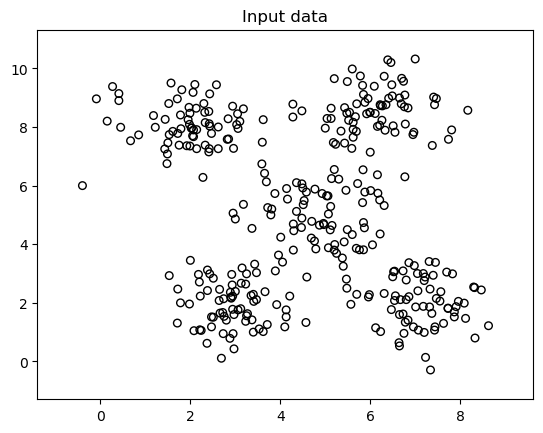

In [31]:
# Plot the input data
# a. creates a frame
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:,0].min()
x_max = X[:,0].max()

# second column
y_min = X[:,1].min()
y_max = X[:,1].max()

# same as above: get the range of X and Y (shorter way)
# x_min, x_max = X[:,0].min(), X[:,0].max()
# y_min, y_max = X[:,1].min(), X[:,1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# scatterplot of the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

## Step 2: Implement KMeans Algorithm for Training a Prediction Model

### Determine the nuber of clusters K by Elbow and Silouette Methods

The __silhouette value__ is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). <br>
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. (Wikipedia)

In [5]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

Distortion:  [2.2374906999035775, 1.7616159945698866, 1.3249150461058175, 0.9944142982102744, 0.9306000198247169, 0.8995775590291698, 0.8486290209054872, 0.8142342738820286]


/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


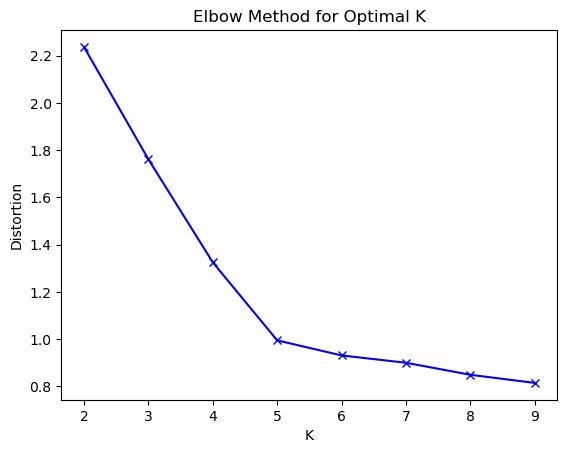

In [6]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [7]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au


Number of clusters = 2
Silhouette score = 0.49121852145680034

Number of clusters = 3
Silhouette score = 0.4929056744601706

Number of clusters = 4
Silhouette score = 0.5139269440580392


/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au


Number of clusters = 5
Silhouette score = 0.5906519837897816

Number of clusters = 6
Silhouette score = 0.5276980288482701


/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au


Number of clusters = 7
Silhouette score = 0.47085907852401

Number of clusters = 8
Silhouette score = 0.4687552641720069

Number of clusters = 9
Silhouette score = 0.3849564942396724


/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tdi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Optimal number of clusters K
num_clusters = 4

In [20]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [21]:
# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=4, n_init=20)

## Step 3: Implement the Trained Model for Prediction

In [23]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 0,
       1, 3, 2, 3, 0, 3, 1, 2, 3, 0, 1, 1, 2, 3, 0, 2, 1, 2, 3, 0, 3, 1,
       2, 3, 0, 2, 1, 2, 3, 0, 1, 1, 2, 3, 0, 1, 1, 2, 3, 0, 3, 1, 2, 3,
       0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3, 0, 1, 1, 2, 3, 0, 2,
       1, 2, 3, 0, 3, 1, 2, 3, 0, 1, 1, 2, 3, 0, 3, 1, 2, 3, 0, 3, 1, 2,
       3, 0, 3, 1, 2, 3, 0, 0, 1, 2, 3, 0, 3, 1, 2, 3, 0, 2, 1, 2, 3, 0,
       3, 1, 2, 3, 0, 3, 1, 2, 3, 0, 1, 1, 2, 3, 0, 3, 1, 2, 3, 0, 2, 1,
       2, 3, 0, 2, 1, 2, 3, 0, 3, 1, 2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 2, 3,
       0, 3, 1, 2, 3, 0, 1, 1, 2, 3, 0, 1, 1, 2, 3, 0, 3, 1, 2, 3, 0, 2,
       1, 2, 3, 0, 3, 1, 2, 3, 0, 3, 1, 2, 3, 0, 3, 1, 2, 3, 0, 3, 1, 2,
       3, 0, 2, 1, 2, 3, 0, 3, 1, 2, 3, 0, 0, 1, 2, 3, 0, 1, 1, 2, 3, 0,
       2, 1, 2, 3, 0, 2, 1, 2, 3, 0, 3, 1, 2, 3, 0, 0, 1, 2, 3, 0, 2, 1,
       2, 3, 0, 3, 1, 2, 3, 0, 2, 1, 2, 3, 2, 2, 1, 2, 3, 0, 2, 1, 2, 3,
       0, 3, 1, 2, 3, 0, 1, 1, 2, 3, 0, 1, 1, 2, 3,

In [24]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[3 0 2 1 2 3 0 2 1 2 3 0 2 1 2 3 0 2 1 2 3 0 1 3 2 3 0 3 1 2 3 0 1 1 2 3 0
 2 1 2 3 0 3 1 2 3 0 2 1 2 3 0 1 1 2 3 0 1 1 2 3 0 3 1 2 3 0 2 1 2 3 0 2 1
 2 3 0 2 1 2 3 0 1 1 2 3 0 2 1 2 3 0 3 1 2 3 0 1 1 2 3 0 3 1 2 3 0 3 1 2 3
 0 3 1 2 3 0 0 1 2 3 0 3 1 2 3 0 2 1 2 3 0 3 1 2 3 0 3 1 2 3 0 1 1 2 3 0 3
 1 2 3 0 2 1 2 3 0 2 1 2 3 0 3 1 2 3 0 2 1 2 3 0 2 1 2 3 0 3 1 2 3 0 1 1 2
 3 0 1 1 2 3 0 3 1 2 3 0 2 1 2 3 0 3 1 2 3 0 3 1 2 3 0 3 1 2 3 0 3 1 2 3 0
 2 1 2 3 0 3 1 2 3 0 0 1 2 3 0 1 1 2 3 0 2 1 2 3 0 2 1 2 3 0 3 1 2 3 0 0 1
 2 3 0 2 1 2 3 0 3 1 2 3 0 2 1 2 3 2 2 1 2 3 0 2 1 2 3 0 3 1 2 3 0 1 1 2 3
 0 1 1 2 3 0 2 1 2 3 0 1 1 2 3 0 2 1 2 3 0 1 1 2 3 0 2 1 2 3 0 2 1 2 3 0 3
 1 2 3 0 3 1 2 3 0 3 1 2 3 0 2 1 2]


## Step 4: Review the Results

### Clusters seen one by one

Cluster  0 :  (72, 2)


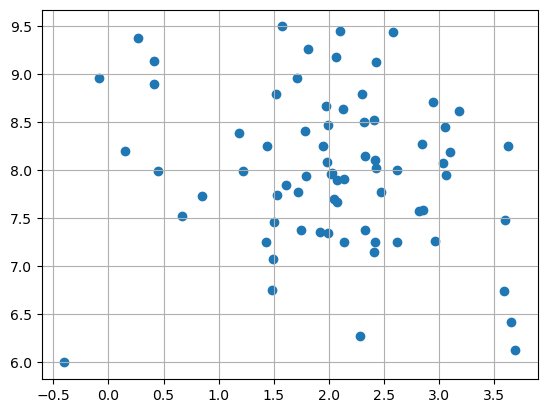

Cluster  1 :  (83, 2)


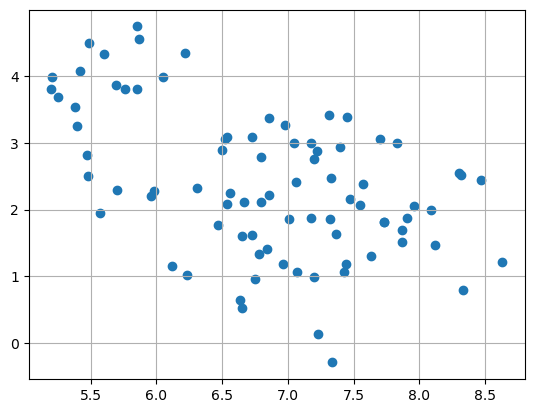

Cluster  2 :  (99, 2)


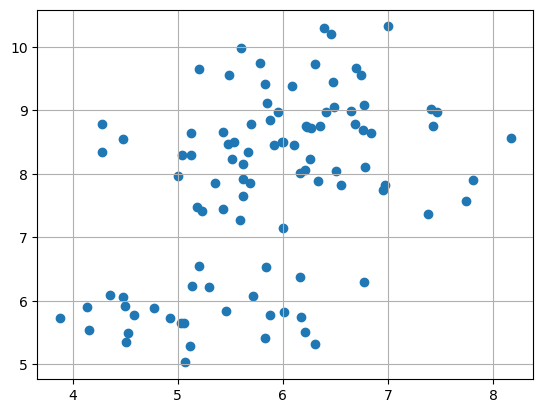

Cluster  3 :  (96, 2)


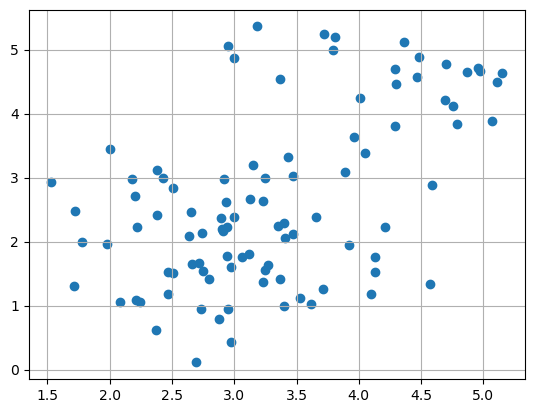

In [25]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

### All Clusters in One Plot

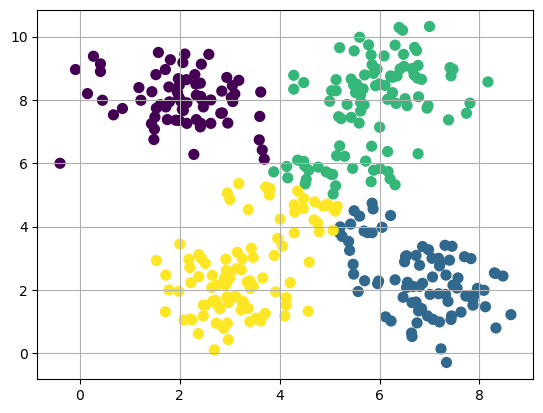

In [26]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [27]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[2.03069444 8.00013889]
 [6.82843373 2.37903614]
 [5.84555556 7.77505051]
 [3.31354167 2.65322917]]


### Print Bondaries of Clusters

In [28]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [29]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans.predict(np.c_[xx,yy])
labels = labels.reshape(x_vals.shape)

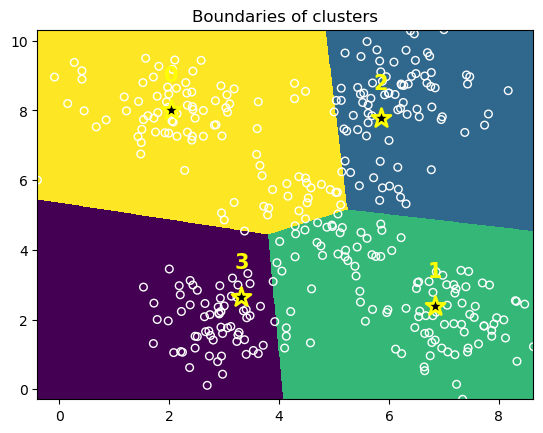

In [30]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

For labeling clusters see also https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

## Step 5: Experiment With Different K

In [ ]:
# Repeat the training and clustering with different number of clusters K
# Compare the images
# Select the one with most compact clusters

## Step 6: Implement the Model on New Data

In [32]:
# predict cluster of nonseen data
test = kmeans.predict([[5.8, 4.5]])
print(test)

[1]


In [33]:
test = kmeans.predict([[6.0, 8.0]]) == 3
print(test)

[False]


## Step 7: Store the Model in a File

In [ ]:
!pip3 install joblib

In [ ]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(kmeans, '../data/kmmodel.pkl')

## Practice

Implement the procedure to a data set from the file __sales.csv__.
Observe the recommended number of clusters and the initial location of the centroids.